# 分野別の特色ある大学の検索
このチュートリアルでは、特定の分野に特に重点を置いている大学を取り出します。
これは大学の規模によらず、その大学がどれくらいその分野に偏って論文投稿、被引用数の割合を占めるかを、平均と比較したものです。

例えば、日本の各大学の平均では, 大学から出る全論文の被引用数のうち、各分野から出る論文の被引用数の占める割合は、通常
生物学では 2.5%前後、考古学では、0.06% となっています（考古学分野は論文数がたくさん出ないので、被引用数も小さくなりがちです）。
したがって、ある大学でその大学の論文の被引用数のうち 0.1% を考古学の論文が占めていれば、その大学では考古学に特色があると言えます。
![image.png](../supplementary/rca_institution_topic.png)

これは、大学が小規模で被引用数が小さかったり、依然として生物学の被引用数割合 (2.5%) よりもずっと小さくても検出が可能です。
単純な被引用数の比較からでは埋もれてしまい見えてこない、大学の特色を取り出すことができます。

Shift + Enterキーで上から順に実行してみてください。

詳しく知りたい方は、Revealed Comperative Advantage(比較顕示優位)で検索してみてください。「研究評価・科学論のための科学計量学入門」(丸善株式会社)などを参照のこと。
例えば、同じ指標で世界各国の貿易品目の偏りを示したのがこちらです：https://unctadstat.unctad.org/EN/RcaRadar.html


In [5]:
# コードを走らせるための初期設定1
from pyalex import Works, Authors, Sources, Institutions, Concepts, Funders
import pyalex

import pandas as pd
import numpy as np

/Users/ti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
# コードを走らせるための初期設定2
import sys
import os
import math
import matplotlib.pyplot as plt

env = "colab" # "colab" or "local"

if env == "colab":
    %cd /content/sample_data/
    !git clone https://github.com/ScisciJP/scisciJP2024_tutorial.git
    path = '/content/sample_data/scisciJP2024_tutorial'
if env == "local":
    path = 'YOUR_PATH' # YOUR PATH

sys.path.append(path)
print(os.getcwd())

os.chdir(path)
sys.path

%pip install pyalex 
%pip install japanize_matplotlib 

import util

/Users/ti/Documents/code/scisciJP2024_tutorial
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pyalex.config.email = "zhmuler@gmail.com" # your@mail.address

In [8]:
country = "JP" # compare within Japan.
# 選べる分野（トピック）の一覧はこちらです。
# https://docs.google.com/spreadsheets/d/1v-MAq64x4YjhO7RWcB-yrKV5D_2vOOsxl4u6GBKEXY8/edit?gid=983250122#gid=983250122

# 例：地震学
topics = [
    10001, #Tectonic and Geochronological Evolution of Orogens
    10110, #Seismicity and Tectonic Plate Interactions
    10271, #Seismic Waveform Inversion in Geophysics
    10413, #Mantle Dynamics and Earth's Structure
    11757, #High-Resolution Seismic Noise Tomography
]

In [9]:
# 機関の平均の被引用数のデータを取得します。

# pyalexObj = Institutions().filter(country_code=country).select(["id", "display_name", "cited_by_count"])
# result = util.getAll(pyalexObj)
# institutions_df = pd.DataFrame(result)
# institutions_df.to_pickle("./supplementary/institutions_df.pickle")

institutions_df = pd.read_pickle("./supplementary/institutions_df.pickle")

In [10]:
# 国内の相対的な組織のランキングではなく、組織内の個性、強み分析
# 組織内で成果が出ている分野と、インパクトを与えている分野の分析。

citation_counts = pd.DataFrame()

for t in topics:  #tqdm.tqdm(
    # 通常は引用数が安定するまで10年程度かかるため、2010年から2014年までの論文を対象とする。
    pyalexObj = Works().filter(
        from_publication_date="2010-01-01",to_publication_date="2014-12-31",\
        cited_by_count=">0",\
        authorships={"institutions":{"country_code":country}},\
        primary_topic={"id": "t"+str(t)}
    ).select([
        "id",
        "authorships",
        "cited_by_count"
    ])

    result = util.getAll(pyalexObj) # verbous=False
    for r in result:
        r["topic"] = t
        authorships = r["authorships"]
        authors = []
        for a in authorships:
            institution = a["institutions"]
            if len(institution)>0:
                institution_id = institution[0]["id"]
                if r.get("authors/institution/id", None) is None:
                    r["authors/institution/id"] = [institution_id]
                else:
                    r["authors/institution/id"].append(institution_id)
    
    citation_counts = pd.concat([citation_counts, pd.DataFrame(result)],axis=0)

citation_counts.shape[0] # 取得できた論文数

Fetching 1391 objects. it may takes 6.96 to 20.87 seconds


8it [00:13,  1.74s/it]


Fetching 1718 objects. it may takes 8.59 to 25.77 seconds


10it [00:17,  1.79s/it]


Fetching 163 objects. it may takes 0.81 to 2.44 seconds


2it [00:02,  1.47s/it]


Fetching 941 objects. it may takes 4.71 to 14.12 seconds


6it [00:10,  1.74s/it]


Fetching 317 objects. it may takes 1.58 to 4.75 seconds


3it [00:04,  1.44s/it]


4530

In [11]:
citation_count = citation_counts.explode(column=["authors/institution/id"])

institution_citation = citation_count.groupby(by="authors/institution/id").sum("cited_by_count").reset_index()
institution_citation = institution_citation.merge(institutions_df, left_on="authors/institution/id", right_on="id")
institution_citation["rca"] = institution_citation["cited_by_count_x"] / institution_citation["cited_by_count_y"] / (institution_citation["cited_by_count_x"].sum() / institution_citation["cited_by_count_y"].sum())
institution_citation = institution_citation.merge(citation_count["authors/institution/id"].value_counts(), left_on="authors/institution/id", right_index=True)

Text(0, 0.5, 'Impact')

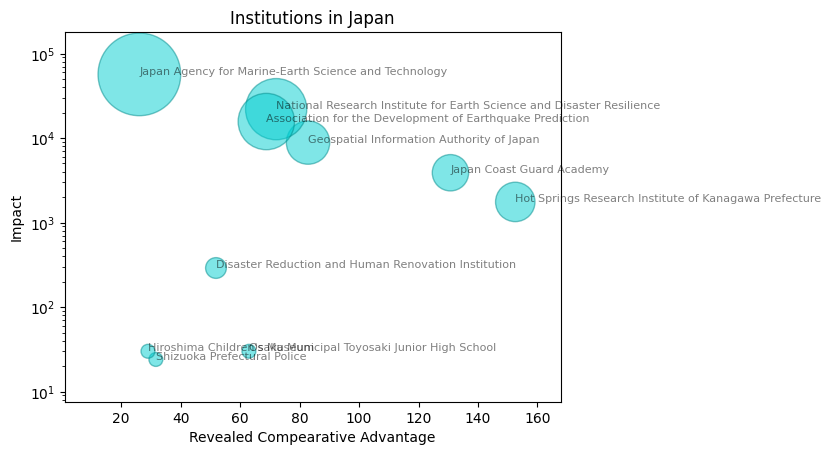

In [12]:
num_inst = 10
top_inst = institution_citation.sort_values(by="rca", ascending=False).head(num_inst)

x_range = (min(top_inst["rca"]), max(top_inst["rca"]))
y_range = (math.log10(min(top_inst["cited_by_count_x"])), math.log10(max(top_inst["cited_by_count_x"])))

# 大分類ごとの色を設定
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 
light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']
# colors = rca["domain_id_x"].apply(lambda x: light_colors[x-1])
# edgecolors = rca["domain_id_x"].apply(lambda x: dark_colors[x-1])

plt.scatter(top_inst["rca"], top_inst["cited_by_count_x"], s=top_inst["count"].apply(lambda x: math.sqrt(x)*100),c=light_colors[2],edgecolors=dark_colors[2], alpha=0.5)
labels = top_inst["display_name"]
for t, txt in enumerate(labels):
    plt.text(top_inst["rca"].iloc[t],top_inst["cited_by_count_x"].iloc[t] ,  txt, fontsize=8,alpha=0.5)

# plt.xscale("log")
plt.yscale("log")
plt.title(f"Institutions in Japan")
plt.xlim(1,x_range[1]*1.1)
plt.ylim(10**(y_range[0]-0.5),10**(y_range[1]+0.5))
plt.xlabel("Revealed Compearative Advantage")
plt.ylabel("Impact")

# 横軸はRCA、縦軸はその機関の被引用数の合計を対数スケールでプロットしています。
# プロットのサイズはその機関がその分野で出した論文数の平方根に比例しています。
# 右に行くほど特色の強い大学、上に行くほど大規模な大学です。

## より詳しく知りたい方は、来年の ScisciTutorialに参加してください
過年度の情報：　https://sciscijp.github.io/scisciconfJP2024/